In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def quadrant_chart(x, y, xtick_labels=None, ytick_labels=None, ax=None):

    # make the data easier to work with by putting it in a dataframe
    data = pd.DataFrame({'x': x, 'y': y})

    # let the user specify their own axes
    ax = ax if ax else plt.axes()

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].median()
    x_avg = data['x'].median()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # plot points and quadrant lines
    ax.scatter(x=data['x'], y=data['y'], c='lightblue', edgecolor='darkblue',
    zorder=99)
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UNDATATHON/DATA/Hasil2 OK - Order JSON - Copy.csv',sep=';',decimal=",")
print(df.head())

   Unnamed: 0  Kode.Dagri  Kode.BPS  Urutan JSON           name  Kode.Geo  \
0           9        1109      1101            0       SIMEULUE     61100   
1           1        1101      1103            1   ACEH SELATAN     60700   
2           2        1102      1104            2  ACEH TENGGARA     60800   
3           3        1103      1105            3     ACEH TIMUR     60400   
4           4        1104      1106            4    ACEH TENGAH     60500   

  Nama.Provinsi Nama.Kabupaten.Kota  IRBI.2017  IRBI.2018  ...  IRBI.2020  \
0          Aceh            Simeulue      162.0      162.0  ...     162.00   
1          Aceh        Aceh Selatan      171.2      171.2  ...     171.20   
2          Aceh       Aceh Tenggara      131.2      131.2  ...     127.23   
3          Aceh          Aceh Timur      188.8      188.8  ...     176.05   
4          Aceh         Aceh Tengah      124.8      124.8  ...     124.80   

   IRBI.2021  IRBI.2022  Y_2017  Y_2018  Y_2019  Y_2020  Y_2021  Y_2022  \

In [ ]:
df.dtypes

Unnamed: 0               int64
Kode.Dagri               int64
Kode.BPS                 int64
Urutan JSON              int64
name                    object
Kode.Geo                 int64
Nama.Provinsi           object
Nama.Kabupaten.Kota     object
IRBI.2017              float64
IRBI.2018              float64
IRBI.2019              float64
IRBI.2020              float64
IRBI.2021              float64
IRBI.2022              float64
Y_2017                 float64
Y_2018                 float64
Y_2019                 float64
Y_2020                 float64
Y_2021                 float64
Y_2022                 float64
korel                  float64
dtype: object

In [ ]:
x=df.iloc[:,8:13].median(axis=1)
y=df.iloc[:,14:19].median(axis=1)

Text(0.5, 0, 'IRBI')

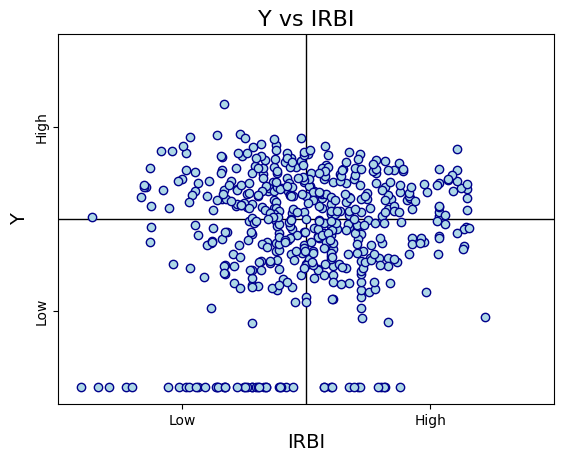

In [ ]:
quadrant_chart(
    x=df.iloc[:,8:13].median(axis=1),
    y=df.iloc[:,14:19].median(axis=1),
    xtick_labels=['Low', 'High'],
    ytick_labels=['Low', 'High']
)

plt.title('Y vs IRBI', fontsize=16)
plt.ylabel('Y', fontsize=14)
plt.xlabel('IRBI', fontsize=14)

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Assuming df is your DataFrame

# Calculate median values for x and y axis
x_median = df.iloc[:, 8:13].median(axis=1)
y_median = df.iloc[:, 14:19].median(axis=1)

# Create a scatter plot with Plotly
fig = go.Figure()

# Add the median points as a scatter plot
fig.add_trace(go.Scatter(x=x_median, y=y_median, mode='markers'))

# Set titles and labels
fig.update_layout(
    title='Y vs IRBI',
    xaxis_title='IRBI',
    yaxis_title='Y',
    xaxis=dict(
        tickmode='array',
        tickvals=[x_median.min(), x_median.max()],
        ticktext=['Low', 'High']
    ),
    yaxis=dict(
        tickmode='array',
        tickvals=[y_median.min(), y_median.max()],
        ticktext=['Low', 'High']
    )
)

# If you want to add lines to divide the chart into quadrants, you might add them like this:
fig.add_shape(type="line",
              x0=x_median.min(), y0=y_median.median(), x1=x_median.max(), y1=y_median.median(),
              line=dict(color="RoyalBlue", width=2))

fig.add_shape(type="line",
              x0=x_median.median(), y0=y_median.min(), x1=x_median.median(), y1=y_median.max(),
              line=dict(color="RoyalBlue", width=2))

# Show the figure
fig.show()

In [1]:
import plotly.express as px
import pandas as pd

# Menggunakan data iris dari Plotly Express
df = px.data.iris()

# Menghitung nilai median kolom tertentu dari DataFrame Anda
df['median_value'] = df.iloc[:, 8:13].median(axis=1)

# Membuat scatter plot dengan Plotly Express
fig = px.scatter(
    df,
    x="median_value",  # Menggunakan median_value sebagai sumbu x
    y="sepal_length",  # Menggunakan sepal_length sebagai sumbu y
    color="species",   # Memberikan warna berdasarkan kolom 'species'
    size='petal_length',  # Menggunakan petal_length untuk ukuran marker
    hover_data=['petal_width'],  # Data yang muncul saat dihover
    labels={'median_value': 'IRBI', 'sepal_length': 'Y'},  # Nama sumbu
    title='Y vs IRBI',  # Judul plot
)

fig.update_xaxes(tickvals=[df['median_value'].min(), df['median_value'].max()],
                 ticktext=['Low', 'High'], title='IRBI', tickfont=dict(size=14))
fig.update_yaxes(title='Y', tickfont=dict(size=14))
fig.update_layout(title_font=dict(size=16))
fig.show()
